In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from time import time
from tqdm import tqdm
from scipy.stats.stats import pearsonr

In [2]:
# Initilizes the experiment and utils
exp = ReadoutExperiment()
utils = Utils.instance()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:36009
INFO:DRV:      Host server up..............Done 0.05s
INFO:DRV:      Encoding axons/synapses.....Done 15.04s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1594904757.6485827
Include dir is : /home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1594904757.6485827/initnetwork_0_0.c
gcc -Wall -I/home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -st

INFO:DRV:      Compiling Embedded snips....Done 0.57s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1594904757.6485827/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1594904757.6485827/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.75s
INFO:DRV:      Encoding probes.............Done 1.76ms
INFO:DRV:      Configuring registers.......Done 15.29s
INFO:DRV:      Transferring spikes.........Done 0.05s
INFO:DRV:      Transferring probes.........Done 1.84ms
INFO:HST:  chip=0 cpu=0 Transfered values 20, 245, 30 
INFO:HST:  chip=1 cpu=0 Transfered values 20, 245, 30 
INFO:HST:  chip=0 cpu=0 Reset current/vol

INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 3920 to 3950
INFO:HST:  chip=0 cpu=0 Reset functional state at 3950
INFO:HST:  chip=1 cpu=0 Reset functional state at 3950
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4165 to 4195
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4165 to 4195
INFO:HST:  chip=0 cpu=0 Reset functional state at 4195
INFO:HST:  chip=1 cpu=0 Reset functional state at 4195
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4410 to 4440
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4410 to 4440
INFO:HST:  chip=0 cpu=0 Reset functional state at 4440
INFO:HST:  chip=1 cpu=0 Reset functional state at 4440
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4655 to 4685
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4655 to 4685
INFO:HST:  chip=0 cpu=0 Reset functional state at 4685
INFO:HST:  chip=1 cpu=0 Reset functional state at 4685
INFO:HST:  chip=0 cpu=0 Reset current/volt

In [7]:
# Reservoir
"""
INFO:DRV:      Executing...................Done 393.19s
INFO:DRV:      Processing timeseries.......Done 2.09s
INFO:DRV:  Executor: 6125 timesteps........Done 410.24s
"""
timePerTrial = 393.19/25
realTimeFactor = timePerTrial/2
print(timePerTrial)
print(realTimeFactor)
# Pool
"""
INFO:DRV:      Executing...................Done 37.24s
INFO:DRV:      Processing timeseries.......Done 0.08s
INFO:DRV:  Executor: 6125 timesteps........Done 52.68s
"""
timePerTrial = 37.24/25
realTimeFactor = timePerTrial/2
print(timePerTrial)
print(realTimeFactor)

15.7276
7.8638
1.4896
0.7448


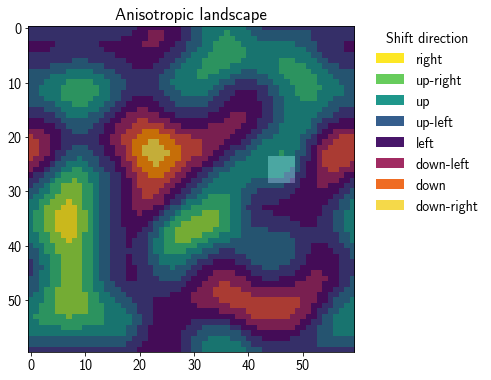

In [5]:
exp.net.plot.landscape()

In [6]:
exp.net.plot.plotDir

'/home/seq/05-reward/v0.x/datalog/2020-07-14_17-03-57/plots/'

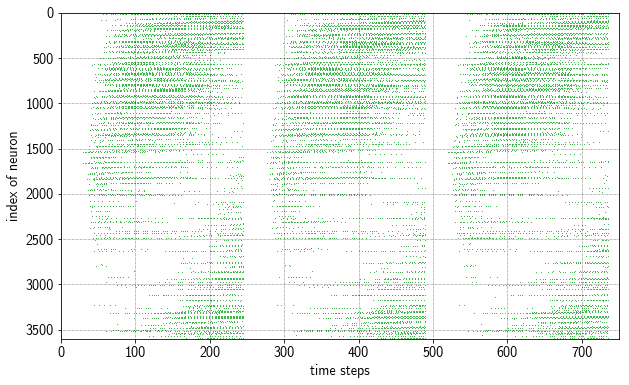

In [7]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=750, colorEx=exp.p.pltColor3, figsize=(10,6))

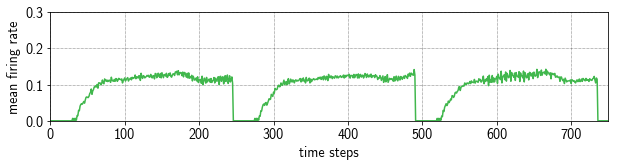

In [8]:
exp.net.plot.reservoirRates(fr=0, to=750, ylim=(0.0,0.3), colorEx=exp.p.pltColor3, figsize=(10,2))

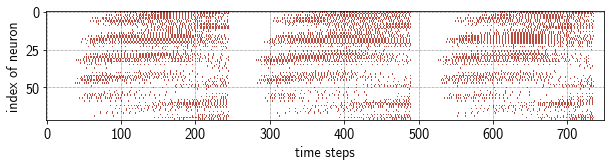

In [9]:
exp.net.plot.outputSpikeTrain(fr=0, to=750, figsize=(10,2))

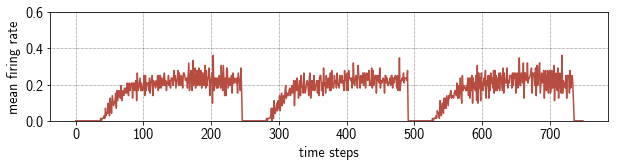

In [10]:
exp.net.plot.outputRates(fr=0, to=750, ylim=(0,0.6), figsize=(10,2))

In [11]:
#np.save('data/comparison/spikes_ex-anisotropic.npy', exp.net.exSpikeData)
#np.save('data/comparison/spikes_out-anisotropic.npy', exp.net.outSpikeData)